# KNN算法的原理

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 样本特征
data_X =[
    [1.3,6],
    [3.5,5],
    [4.2,2],
    [5,3.3],
    [2,9],
    [5,7.5],
    [7.2,4],
    [8.1,8],
    [9,2.5]
]

In [4]:
# 样本标记
data_Y = [0,0,0,0,1,1,1,1,1]

In [5]:
# 训练集
X_train = np.array(data_X)
Y_train = np.array(data_Y)

In [6]:
X_train

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 3.3],
       [2. , 9. ],
       [5. , 7.5],
       [7.2, 4. ],
       [8.1, 8. ],
       [9. , 2.5]])

In [7]:
Y_train

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [8]:
Y_train == 0

array([ True,  True,  True,  True, False, False, False, False, False])

In [9]:
X_train[Y_train==0]  

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 3.3]])

In [10]:
X_train[Y_train==0,0]

array([1.3, 3.5, 4.2, 5. ])

In [11]:
X_train[Y_train==0,1]

array([6. , 5. , 2. , 3.3])

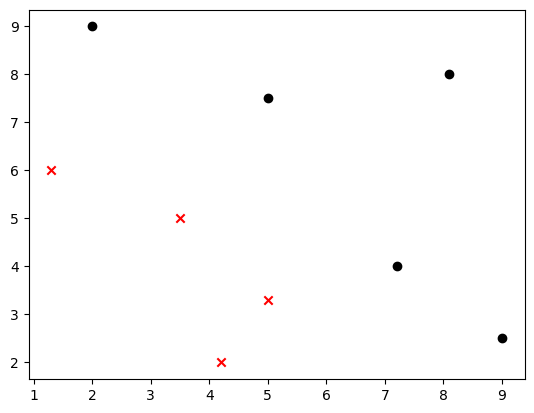

In [12]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1],color='red',marker='x')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1],color='black',marker='o')
plt.show()

In [13]:
# 新的样本点
data_new = np.array([4,5])

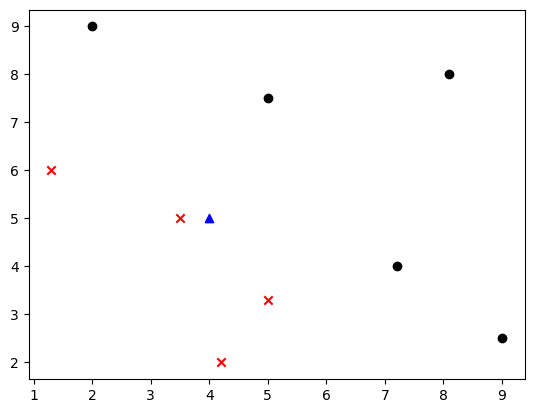

In [14]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1],color='red',marker='x')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1],color='black',marker='o')
plt.scatter(data_new[0],data_new[1],color='blue',marker='^')
plt.show()

## KNN的预测过程

### 1.计算样本点与已知样本点的距离

In [17]:
for data in X_train:
    print(np.sqrt(np.sum((data - data_new)**2)))

2.879236009777594
0.5
3.006659275674582
1.9723082923316022
4.47213595499958
2.692582403567252
3.3526109228480423
5.080354318352215
5.5901699437494745


In [18]:
distances = [np.sqrt(np.sum((data - data_new)**2)) for data in X_train]
distances

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.9723082923316022,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

### 2.按距离排序

In [20]:
np.sort(distances)
distances
# 注意此步并不改变distances本身元素的排列

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.9723082923316022,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

In [21]:
sort_index = np.argsort(distances)
sort_index

array([1, 3, 5, 0, 2, 6, 4, 7, 8], dtype=int64)

### 确定k的值

In [23]:
k = 5

### 4.距离最近的k个点投票

In [25]:
first_k = [Y_train[i] for i in sort_index[:k]]
first_k
#这一步是将离data_new最近的K个样本点的下标索引所对应的样本标记放进first_k数组当中

[0, 0, 1, 0, 0]

In [26]:
from collections import Counter
Counter(first_k)
#字典的形式

Counter({0: 4, 1: 1})

In [27]:
Counter(first_k).most_common()

[(0, 4), (1, 1)]

In [28]:
Counter(first_k).most_common(1)

[(0, 4)]

In [29]:
predict_Y = Counter(first_k).most_common(1)[0][0]
predict_Y

0